In [1]:
import numpy as np

from sklearn.linear_model import LinearRegression

In [2]:
data = np.loadtxt("data.csv", delimiter=",")

In [3]:
data #first column is x and the other is the target(y)

array([[ 32.50234527,  31.70700585],
       [ 53.42680403,  68.77759598],
       [ 61.53035803,  62.5623823 ],
       [ 47.47563963,  71.54663223],
       [ 59.81320787,  87.23092513],
       [ 55.14218841,  78.21151827],
       [ 52.21179669,  79.64197305],
       [ 39.29956669,  59.17148932],
       [ 48.10504169,  75.3312423 ],
       [ 52.55001444,  71.30087989],
       [ 45.41973014,  55.16567715],
       [ 54.35163488,  82.47884676],
       [ 44.1640495 ,  62.00892325],
       [ 58.16847072,  75.39287043],
       [ 56.72720806,  81.43619216],
       [ 48.95588857,  60.72360244],
       [ 44.68719623,  82.89250373],
       [ 60.29732685,  97.37989686],
       [ 45.61864377,  48.84715332],
       [ 38.81681754,  56.87721319],
       [ 66.18981661,  83.87856466],
       [ 65.41605175, 118.5912173 ],
       [ 47.48120861,  57.25181946],
       [ 41.57564262,  51.39174408],
       [ 51.84518691,  75.38065167],
       [ 59.37082201,  74.76556403],
       [ 57.31000344,  95.45505292],
 

In [11]:
x=data[:,0]
y=data[:,1]
x.shape

(100,)

In [12]:
#the internal algorithm for linear regression requires 2d x_train to be passed,so we reshape it
x=x.reshape(-1,1)
x.shape

(100, 1)

In [13]:
from sklearn import model_selection 
x_train,x_test,y_train,y_test= model_selection.train_test_split(x,y,test_size=0.3)

In [15]:
x_train.shape

(70, 1)

In [ ]:
#now import the linear regression algo,train it and then test it

In [16]:
from sklearn.linear_model import LinearRegression
alg1=LinearRegression()
alg1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
#printing the vales of m and c.
alg1.coef_ 

array([1.30197415])

In [25]:
alg1.intercept_

8.924275055515494

In [18]:
y_pred = alg1.predict(x_test)

In [19]:
alg1.score(x_test,y_test)

0.5141440214046521

In [20]:
alg1.score(x_train,y_train)

0.6330530744968446

<function matplotlib.pyplot.show(*args, **kw)>

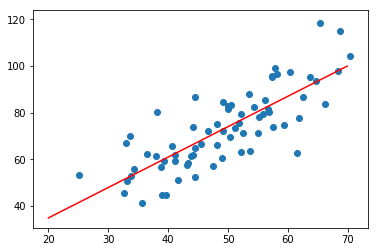

In [31]:
#plotting on training set
from matplotlib import pyplot as plt
m = alg1.coef_[0]
c= alg1.intercept_
x_line= np.arange(20,70,0.1)
y_line=m*x_line + c

plt.plot(x_line,y_line,"r")
plt.scatter(x_train,y_train)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

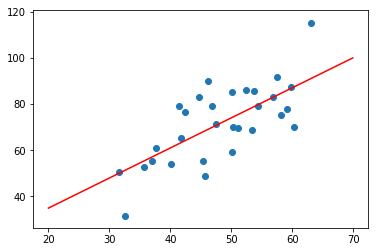

In [32]:
x_line= np.arange(20,70,0.1)
y_line=m*x_line + c

plt.plot(x_line,y_line,"r")
plt.scatter(x_test,y_test)
plt.show

In [34]:
# NOW IMPLEMENTING IT MYSELF
data1=np.loadtxt("data.csv",delimiter=",")
x=data1[:,0]
y=data1[:,1]
x.shape

(100,)

In [ ]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.3)


In [49]:
#this functoin should find out the values of m and c ith the help of x_train and y_train 
# and then return m and c
# m = (x*y).mean - (x).mean * (y).mean /(x*x).mean - (x).mean * (x).mean
# y.mean() = m*x.mean()+c
# c = y - m*x
def fit(x_train,y_train):
    num=(((x_train*y_train).mean())-(x_train.mean()*y_train.mean()))
    den=((x_train**2).mean()-(x_train.mean()**2))
    m=num/den
    c=(y_train.mean()-m*x_train.mean())
    return m,c

In [33]:
def predict(m,x,c):
    return m*x+c

In [41]:
#mean sq err
def cost(x,y,m,c):
    return ((y-(m*x+c))**2).mean()

In [40]:
#score
def score(y_truth,y_pred):
    u=((y_truth-y_pred)**2).sum()
    v=((y_truth-y_truth.mean())**2).sum()
    return 1-u/v

In [50]:
m,c=fit(x_train,y_train)
m,c

(0.0, 73.08718573181427)

In [51]:
y_pred= predict(m,x_test,c)

In [52]:
# find the cost
cost(x_test,y_test,m,c)

270.48587153139096

In [53]:
print("test score:",score(y_test,y_pred))

test score: -29.15359277848309
